# **Markov clustering algorithm: Tuning the hyperparameters**

**MCL hyperparameters:**
* Inflation
* Expansion

In [1]:
import os

os.chdir('/home/sebastiaan/PhD/Repositories/clusTCR/')

import all dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from clustcr import Clustering, datasets

Figure aesthetics

In [2]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)    # single-column figure

## **Evaluate inflation and expansion**

Define parameter range.

In [ ]:
inflation_range = np.round(np.arange(1.2,2.1,0.1),1)
expansion_range = np.round(np.arange(2,11,1),0)

# Generate list of hyperparameter pairs to test
params = []
for i in inflation_range:
    for j in expansion_range:
        params.append([i, j])

In [1]:
# Data
cdr3 = datasets.vdjdb_beta()
epitopes = datasets.vdjdb_beta(epitopes=True)
        
# Scan hyperparameter space
res = []
for pair in params:
    t0 = time.time()
    mcl = Clustering(mcl_params=pair, n_cpus=8).fit(cdr3)
    t = time.time() - t0
    clusters = mcl.clusters_df
    metrics = mcl.metrics(epitopes)
    summ = metrics.summary()
    summ['inflation'] = pair[0]
    summ['expansion'] = pair[1]
    summ['time'] = t
    res.append(summ)
    
# Write output to file
res = pd.concat(res)
res.to_csv('./results/mcl_hyperparameters.tsv', sep='\t', index=False)

## **Plot results**

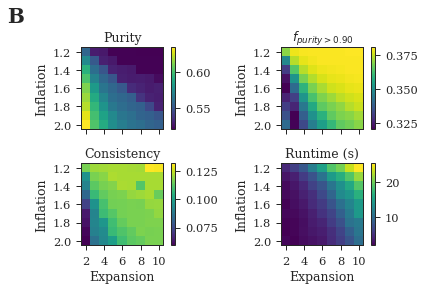

In [62]:
data = pd.read_csv('./results/mcl_hyperparameters.tsv', sep='\t')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2)

# Purity
metric_data = data[data['metrics']=='purity']
inflation = np.round(metric_data.inflation.unique(),1)
expansion = metric_data.expansion.unique()
values = np.asarray(metric_data.pivot(index="inflation", columns="expansion", values="actual"))
im = ax1.imshow(values, cmap='viridis')
ax1.set_xticks(np.arange(len(expansion))[::2])
ax1.set_yticks(np.arange(len(inflation))[::2])
ax1.set_xticklabels("")
ax1.set_yticklabels(inflation[::2])
ax1.set_xlabel('')
ax1.set_ylabel('Inflation')
fig.colorbar(im, ax=ax1)
ax1.set_title("Purity")

# Purity_90
metric_data = data[data['metrics']=='purity_90']
inflation = np.round(metric_data.inflation.unique(),1)
expansion = metric_data.expansion.unique()
values = np.asarray(metric_data.pivot(index="inflation", columns="expansion", values="actual"))
im = ax2.imshow(values, cmap='viridis')
ax2.set_xticks(np.arange(len(expansion))[::2])
ax2.set_yticks(np.arange(len(inflation))[::2])
ax2.set_xticklabels("")
ax2.set_yticklabels(inflation[::2])
ax2.set_xlabel('')
ax2.set_ylabel('Inflation')
fig.colorbar(im, ax=ax2)
ax2.set_title(r"$f_{purity > 0.90}$")

# Consistency

metric_data = data[data['metrics']=='consistency']
inflation = np.round(metric_data.inflation.unique(),1)
expansion = metric_data.expansion.unique()
values = np.asarray(metric_data.pivot(index="inflation", columns="expansion", values="actual"))
im = ax3.imshow(values, cmap='viridis')
ax3.set_xticks(np.arange(len(expansion))[::2])
ax3.set_yticks(np.arange(len(inflation))[::2])
ax3.set_xticklabels(expansion[::2])
ax3.set_yticklabels(inflation[::2])
ax3.set_xlabel('Expansion')
ax3.set_ylabel('Inflation')
fig.colorbar(im, ax=ax3)
ax3.set_title("Consistency")

# Runtime
metric_data = data[data['metrics']=='retention']
inflation = np.round(metric_data.inflation.unique(),1)
expansion = metric_data.expansion.unique()
values = np.asarray(metric_data.pivot(index="inflation", columns="expansion", values="time"))
im = ax4.imshow(values, cmap='viridis')
ax4.set_xticks(np.arange(len(expansion))[::2])
ax4.set_yticks(np.arange(len(inflation))[::2])
ax4.set_xticklabels(expansion[::2])
ax4.set_yticklabels(inflation[::2])
ax4.set_xlabel('Expansion')
ax4.set_ylabel('Inflation')
fig.colorbar(im, ax=ax4)
ax4.set_title("Runtime (s)")

ax1.text(-0.7, 1.5, 'B', transform=ax1.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')

fig.tight_layout()
fig.savefig('results/figures/mcl_hyperparameters.eps', format='eps', bbox_inches='tight')